# Performance Assement Data Cleaning — D206 


## Information
Matthew Blasa 
<br>
Student ID: 001781641
<br>
MS Data Analytics (05/01/2021)
<br>
Program Mentor: Kirk Kelly 
<br>
(503)805-0297
<br>
mblasa@wgu.edu

### Table of Contents

* [Part I: Research Question](#Research_Question)
* [Part II: Data-Cleaning Plan](#Data_Cleaning_Plan)
* [Part III: Data Cleaning](#Data_Cleaning)
* [Part IV: Supporting Documents](#Sources)

# Part I: Research Question <a class="anchor" id="Research_Question"></a>

## A. Question 

Can we determine which individual customers are at high risk of churn? And, can we determine which features are most significant to churn?

## B.  Variables

The data has over 10,000 rows. We will use the churn column, as a dependent variable. Churn contains data on wether or not a customer has continued or discontinued service within the last month

Predictors (independent variables) that may identify a relationship with the churn column are: 
* Services, such a mulitple phone lines.
* Customer account information: payment methods, specific packages, paperless billing, bandiwidth usage.
* Customer Demographic Info: gender, marital status, income. 
* Customer Responses to the survey. The survey was self-report by the customers, rating their service experience. 

The data is both numerical (as in the yearly GB bandwidth usage; customer annual income) and categorical (a "Yes" or "No" for Churn; customer job).

# Part II: Data-Cleaning Plan <a class="anchor" id="Data_Cleaning_Plan"></a>

## C1 Techniques

My process will be:
<ol>
    <li>Create a file on my computer, and have a repository on GitHub as backup and for version control</li> 
    <li> Convert the CSV into a dataframe using the Pandas python library. </li> 
    <li> Evaluate the data struture to better understand input data.</li> 
    <li> Renaming the variables each time there is a significant change or cleaning. 
    <li> Look for misspellings, missing data, unnamed columns, etc. 
    <li> Find outliers in the data set, and distribution of features. 
    <li>Fill null values with values of central tendency: (mean, median or mode). I wil also remove outliers that are several standard deviations above the mean. 

<ol>

## C2 Approach

There is a large amount of data missing from the data set. For certain columns, such as children, age, and income, approximately 25% of the data is missing. This is about 2500 rows in the data set, non-overlapping. Given the size of the missing data, dropping the nulls would bias the results of the principal component analysis, or any other analytics. To compensate for this, we will be filling in the data, using values of central tendency. Data that is unrelated to our hypothesis will not have their nulls filled. 

## C3 Languages and Packages 

I will use the Python, since I use it at work to perform EDAs and clean data. I'll be using jupyter notebook, since it allows me to use markdowns to answer questions and program at the same time. To save time, I will be using several data science Python libraries to simplify cleaning. The following will be used:

* NumPy - to work with arrays
* Pandas - used to 
* Matplotlib - plotting charts 
* Scikit-learn - for PCA, Machine Learning, and Normaliization. 
* SciPy - used for mathematical tranformations. 
* Seaborn - visulization of more complex graphs
* Missingno - visualization of missing data. 

## C4. Provide the Code:

In [1]:
!pip install pandas
!pip install numpy
!pip install scipy
!pip install sklearn
!pip install matplotlib
!pip install missingno
!pip install pca

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import missingno as msno

In [3]:
ch_df = pd.read_csv('churn_raw_data.csv')

In [4]:
ch_df.head()

,Unnamed: 0,CaseOrder,Customer_id,Interaction,City,State,County,Zip,Lat,Lng,...,MonthlyCharge,Bandwidth_GB_Year,item1,item2,item3,item4,item5,item6,item7,item8
0,1,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,...,171.449762,904.536110,5,5,5,3,4,4,3,4
1,2,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,...,242.948015,800.982766,3,4,3,3,4,3,4,4
2,3,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,...,159.440398,2054.706961,4,4,2,4,4,3,3,3
3,4,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,Del Mar,CA,San Diego,92014,32.96687,-117.24798,...,120.249493,2164.579412,4,4,4,2,5,4,3,3
4,5,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,Needville,TX,Fort Bend,77461,29.38012,-95.80673,...,150.761216,271.493436,4,4,4,3,4,4,4,5


In [5]:
ch_df.columns

Index(['Unnamed: 0', 'CaseOrder', 'Customer_id', 'Interaction', 'City',
       'State', 'County', 'Zip', 'Lat', 'Lng', 'Population', 'Area',
       'Timezone', 'Job', 'Children', 'Age', 'Education', 'Employment',
       'Income', 'Marital', 'Gender', 'Churn', 'Outage_sec_perweek', 'Email',
       'Contacts', 'Yearly_equip_failure', 'Techie', 'Contract', 'Port_modem',
       'Tablet', 'InternetService', 'Phone', 'Multiple', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'PaperlessBilling', 'PaymentMethod', 'Tenure',
       'MonthlyCharge', 'Bandwidth_GB_Year', 'item1', 'item2', 'item3',
       'item4', 'item5', 'item6', 'item7', 'item8'],
      dtype='object')

In [6]:
ch_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 52 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            10000 non-null  int64  
 1   CaseOrder             10000 non-null  int64  
 2   Customer_id           10000 non-null  object 
 3   Interaction           10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  Timezone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              7505 non-null   float64
 15  Age                 

In [7]:
clean_df = ch_df.drop(ch_df.columns[0], axis = 1)
clean_df.head()

,CaseOrder,Customer_id,Interaction,City,State,County,Zip,Lat,Lng,Population,...,MonthlyCharge,Bandwidth_GB_Year,item1,item2,item3,item4,item5,item6,item7,item8
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,38,...,171.449762,904.536110,5,5,5,3,4,4,3,4
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,10446,...,242.948015,800.982766,3,4,3,3,4,3,4,4
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,3735,...,159.440398,2054.706961,4,4,2,4,4,3,3,3
3,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,Del Mar,CA,San Diego,92014,32.96687,-117.24798,13863,...,120.249493,2164.579412,4,4,4,2,5,4,3,3
4,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,Needville,TX,Fort Bend,77461,29.38012,-95.80673,11352,...,150.761216,271.493436,4,4,4,3,4,4,4,5


In [8]:
clean_df.rename(columns = {'item1':'Responses', 
                    'item2':'Fixes', 
                     'item3':'Replacements', 
                     'item4':'Reliability', 
                     'item5':'Options', 
                     'item6':'Respectfulness', 
                     'item7':'Courteous', 
                     'item8':'Listening'}, 
          inplace=True)

In [9]:
clean_df

,CaseOrder,Customer_id,Interaction,City,State,County,Zip,Lat,Lng,Population,...,MonthlyCharge,Bandwidth_GB_Year,Responses,Fixes,Replacements,Reliability,Options,Respectfulness,Courteous,Listening
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,38,...,171.449762,904.536110,5,5,5,3,4,4,3,4
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,10446,...,242.948015,800.982766,3,4,3,3,4,3,4,4
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,3735,...,159.440398,2054.706961,4,4,2,4,4,3,3,3
3,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,Del Mar,CA,San Diego,92014,32.96687,-117.24798,13863,...,120.249493,2164.579412,4,4,4,2,5,4,3,3
4,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,Needville,TX,Fort Bend,77461,29.38012,-95.80673,11352,...,150.761216,271.493436,4,4,4,3,4,4,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,M324793,45deb5a2-ae04-4518-bf0b-c82db8dbe4a4,Mount Holly,VT,Rutland,5758,43.43391,-72.78734,640,...,159.828800,6511.253000,3,2,3,3,4,3,2,3
9996,9997,D861732,6e96b921-0c09-4993-bbda-a1ac6411061a,Clarksville,TN,Montgomery,37042,36.56907,-87.41694,77168,...,208.856400,5695.952000,4,5,5,4,4,5,2,5
9997,9998,I243405,e8307ddf-9a01-4fff-bc59-4742e03fd24f,Mobeetie,TX,Wheeler,79061,35.52039,-100.44180,406,...,168.220900,4159.306000,4,4,4,4,4,4,4,5
9998,9999,I641617,3775ccfc-0052-4107-81ae-9657f81ecdf3,Carrollton,GA,Carroll,30117,33.58016,-85.13241,35575,...,252.628600,6468.457000,4,4,6,4,3,3,5,4


In [10]:
clean_df2 = clean_df.drop(columns=['CaseOrder', 'Zip', 'Lat', 'Lng'])

In [11]:
clean_df2 

,Customer_id,Interaction,City,State,County,Population,Area,Timezone,Job,Children,...,MonthlyCharge,Bandwidth_GB_Year,Responses,Fixes,Replacements,Reliability,Options,Respectfulness,Courteous,Listening
0,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,Point Baker,AK,Prince of Wales-Hyder,38,Urban,America/Sitka,Environmental health practitioner,NaN,...,171.449762,904.536110,5,5,5,3,4,4,3,4
1,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,West Branch,MI,Ogemaw,10446,Urban,America/Detroit,"Programmer, multimedia",1.0,...,242.948015,800.982766,3,4,3,3,4,3,4,4
2,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,Yamhill,OR,Yamhill,3735,Urban,America/Los_Angeles,Chief Financial Officer,4.0,...,159.440398,2054.706961,4,4,2,4,4,3,3,3
3,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,Del Mar,CA,San Diego,13863,Suburban,America/Los_Angeles,Solicitor,1.0,...,120.249493,2164.579412,4,4,4,2,5,4,3,3
4,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,Needville,TX,Fort Bend,11352,Suburban,America/Chicago,Medical illustrator,0.0,...,150.761216,271.493436,4,4,4,3,4,4,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,M324793,45deb5a2-ae04-4518-bf0b-c82db8dbe4a4,Mount Holly,VT,Rutland,640,Rural,America/New_York,Sport and exercise psychologist,3.0,...,159.828800,6511.253000,3,2,3,3,4,3,2,3
9996,D861732,6e96b921-0c09-4993-bbda-a1ac6411061a,Clarksville,TN,Montgomery,77168,Rural,America/Chicago,Consulting civil engineer,4.0,...,208.856400,5695.952000,4,5,5,4,4,5,2,5
9997,I243405,e8307ddf-9a01-4fff-bc59-4742e03fd24f,Mobeetie,TX,Wheeler,406,Rural,America/Chicago,IT technical support officer,NaN,...,168.220900,4159.306000,4,4,4,4,4,4,4,5
9998,I641617,3775ccfc-0052-4107-81ae-9657f81ecdf3,Carrollton,GA,Carroll,35575,Urban,America/New_York,Water engineer,1.0,...,252.628600,6468.457000,4,4,6,4,3,3,5,4


In [12]:
clean_df2.describe()

,Population,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year,Responses,Fixes,Replacements,Reliability,Options,Respectfulness,Courteous,Listening
count,10000.000000,7505.000000,7525.000000,7510.000000,10000.000000,10000.000000,10000.000000,10000.000000,9069.000000,10000.000000,8979.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,9756.562400,2.095936,53.275748,39936.762226,11.452955,12.016000,0.994200,0.398000,34.498858,174.076305,3398.842752,3.490800,3.505100,3.487000,3.497500,3.492900,3.497300,3.509500,3.495600
std,14432.698671,2.154758,20.753928,28358.469482,7.025921,3.025898,0.988466,0.635953,26.438904,43.335473,2187.396807,1.037797,1.034641,1.027977,1.025816,1.024819,1.033586,1.028502,1.028633
min,0.000000,0.000000,18.000000,740.660000,-1.348571,1.000000,0.000000,0.000000,1.000259,77.505230,155.506715,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,738.000000,0.000000,35.000000,19285.522500,8.054362,10.000000,0.000000,0.000000,7.890442,141.071078,1234.110529,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,2910.500000,1.000000,53.000000,33186.785000,10.202896,12.000000,1.000000,0.000000,36.196030,169.915400,3382.424000,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000
75%,13168.000000,3.000000,71.000000,53472.395000,12.487644,14.000000,2.000000,1.000000,61.426670,203.777441,5587.096500,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,111850.000000,10.000000,89.000000,258900.700000,47.049280,23.000000,7.000000,6.000000,71.999280,315.878600,7158.982000,7.000000,7.000000,8.000000,7.000000,7.000000,8.000000,7.000000,8.000000


In [13]:
clean_df2.Churn.value_counts()

No     7350
Yes    2650
Name: Churn, dtype: int64

In [14]:
#Percentage of Churn
clean_df2.Churn.value_counts() / len(clean_df2)

No     0.735
Yes    0.265
Name: Churn, dtype: float64

<AxesSubplot:>

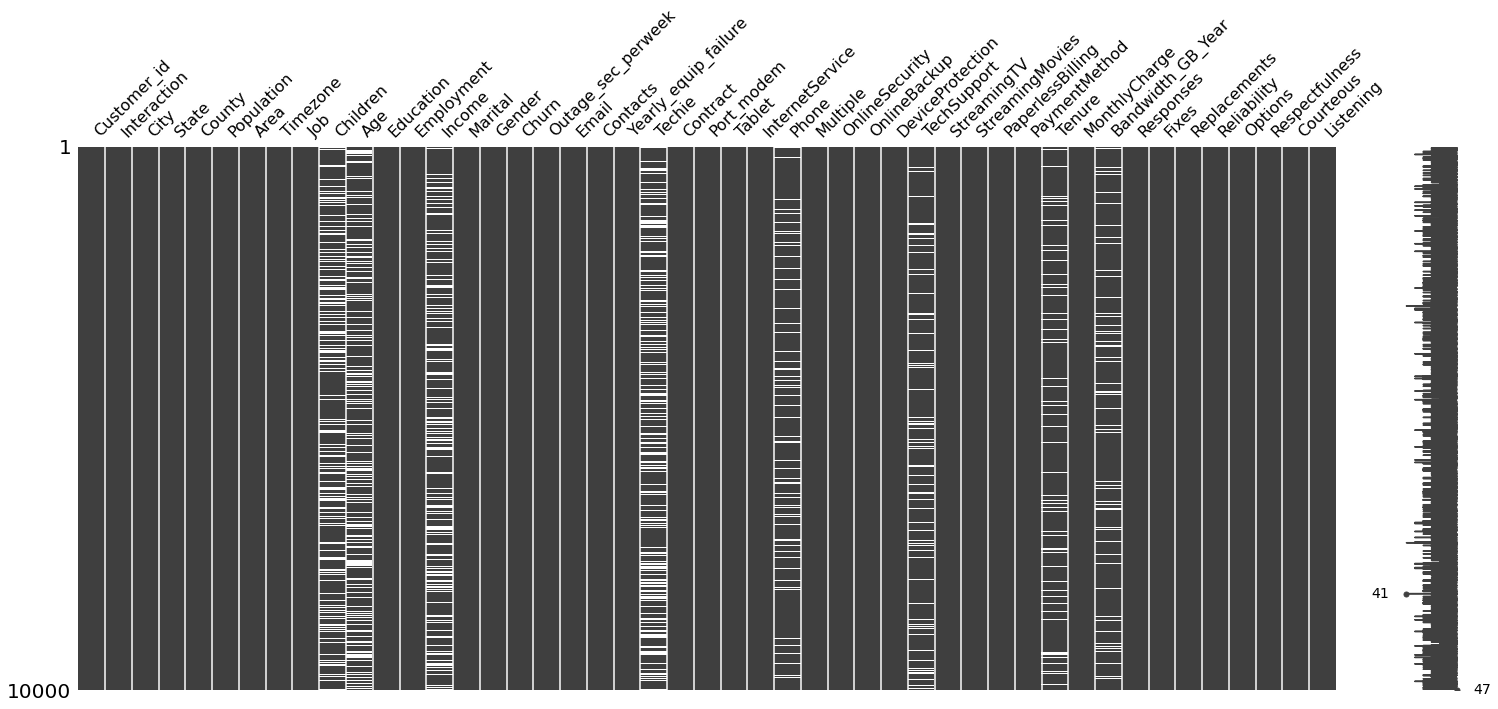

In [15]:
msno.matrix(clean_df2)

There are nulls present in the columns: children, age, income, phone, TechSupport, Tenure, Bandwidth_GB_Year

In [16]:
clean_df2.isnull().sum()

Customer_id                0
Interaction                0
City                       0
State                      0
County                     0
Population                 0
Area                       0
Timezone                   0
Job                        0
Children                2495
Age                     2475
Education                  0
Employment                 0
Income                  2490
Marital                    0
Gender                     0
Churn                      0
Outage_sec_perweek         0
Email                      0
Contacts                   0
Yearly_equip_failure       0
Techie                  2477
Contract                   0
Port_modem                 0
Tablet                     0
InternetService            0
Phone                   1026
Multiple                   0
OnlineSecurity             0
OnlineBackup               0
DeviceProtection           0
TechSupport              991
StreamingTV                0
StreamingMovies            0
PaperlessBilli

In [17]:
clean_df2.isnull().sum()/clean_df2.shape[0]

Customer_id             0.0000
Interaction             0.0000
City                    0.0000
State                   0.0000
County                  0.0000
Population              0.0000
Area                    0.0000
Timezone                0.0000
Job                     0.0000
Children                0.2495
Age                     0.2475
Education               0.0000
Employment              0.0000
Income                  0.2490
Marital                 0.0000
Gender                  0.0000
Churn                   0.0000
Outage_sec_perweek      0.0000
Email                   0.0000
Contacts                0.0000
Yearly_equip_failure    0.0000
Techie                  0.2477
Contract                0.0000
Port_modem              0.0000
Tablet                  0.0000
InternetService         0.0000
Phone                   0.1026
Multiple                0.0000
OnlineSecurity          0.0000
OnlineBackup            0.0000
DeviceProtection        0.0000
TechSupport             0.0991
Streamin

In [18]:
features = ['Employment', 'Area', 'Job', 'Children', 'Age', 'Education', 'Employment', 'Marital', 'Gender', 'Contract', 'PaymentMethod']

In [19]:
for feat in features: 
    print('\n')
    print(feat)
    print('-------------------------')
    print(sorted(clean_df2[feat].unique()))



Employment
-------------------------
['Full Time', 'Part Time', 'Retired', 'Student', 'Unemployed']


Area
-------------------------
['Rural', 'Suburban', 'Urban']


Job
-------------------------
['Academic librarian', 'Accommodation manager', 'Accountant, chartered', 'Accountant, chartered certified', 'Accountant, chartered management', 'Accountant, chartered public finance', 'Accounting technician', 'Actor', 'Actuary', 'Acupuncturist', 'Administrator', 'Administrator, Civil Service', 'Administrator, arts', 'Administrator, charities/voluntary organisations', 'Administrator, education', 'Administrator, local government', 'Administrator, sports', 'Adult guidance worker', 'Adult nurse', 'Advertising account executive', 'Advertising account planner', 'Advertising art director', 'Advertising copywriter', 'Advice worker', 'Aeronautical engineer', 'Agricultural consultant', 'Agricultural engineer', 'Aid worker', 'Air broker', 'Air cabin crew', 'Air traffic controller', 'Airline pilot', 'Am

In [20]:
clean_df2.loc[clean_df2.duplicated()]

,Customer_id,Interaction,City,State,County,Population,Area,Timezone,Job,Children,...,MonthlyCharge,Bandwidth_GB_Year,Responses,Fixes,Replacements,Reliability,Options,Respectfulness,Courteous,Listening


In [21]:
clean_df2.std()


Population              14432.698671
Children                    2.154758
Age                        20.753928
Income                  28358.469482
Outage_sec_perweek          7.025921
Email                       3.025898
Contacts                    0.988466
Yearly_equip_failure        0.635953
Tenure                     26.438904
MonthlyCharge              43.335473
Bandwidth_GB_Year        2187.396807
Responses                   1.037797
Fixes                       1.034641
Replacements                1.027977
Reliability                 1.025816
Options                     1.024819
Respectfulness              1.033586
Courteous                   1.028502
Listening                   1.028633
dtype: float64

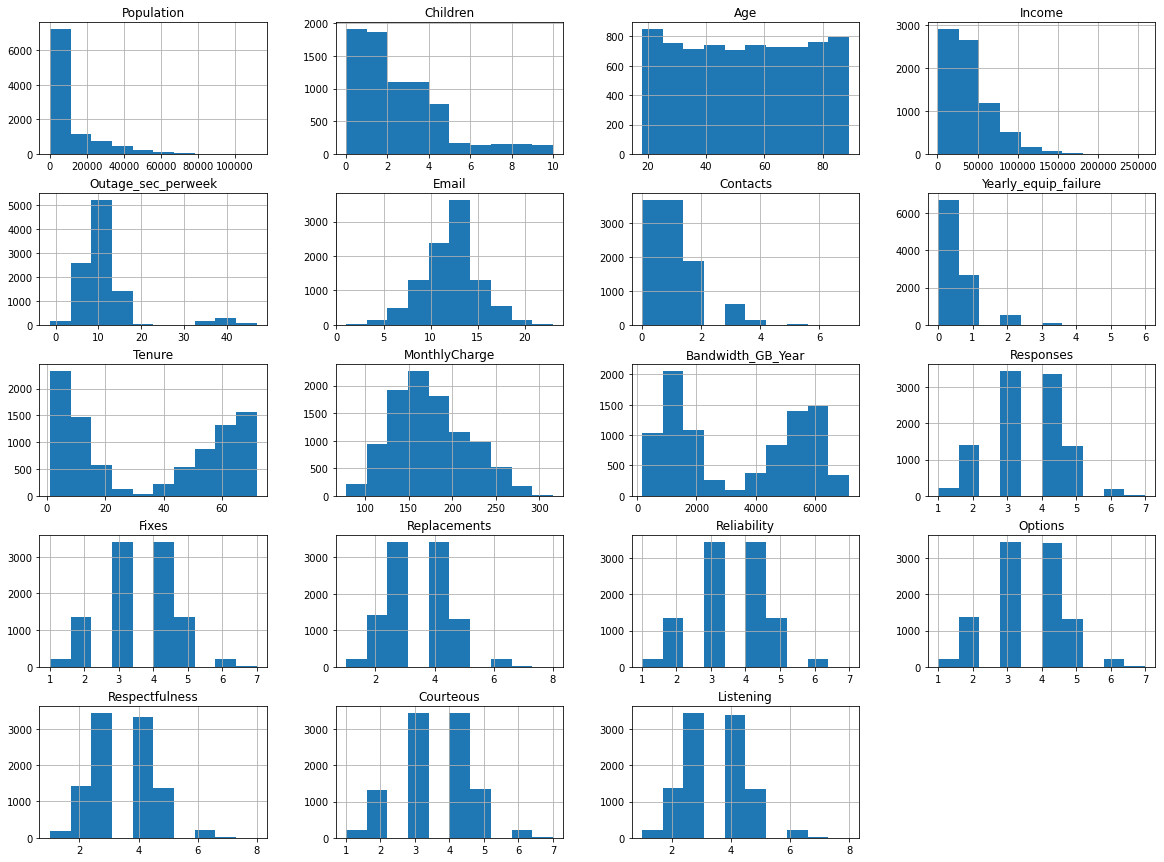

In [22]:
clean_df2.hist(figsize=(20, 15))
plt.show()

In [23]:
clean_df3 = clean_df2.copy()

In [24]:
clean_df3['Children'] = clean_df2['Children'].fillna(clean_df2['Children'].median())
clean_df3['Age'] = clean_df2['Age'].fillna(clean_df2['Age'].median())
clean_df3['Income'] = clean_df2['Income'].fillna(clean_df2['Income'].median())
clean_df3['Tenure'] = clean_df2['Tenure'].fillna(clean_df2['Tenure'].median())
clean_df3['Bandwidth_GB_Year'] = clean_df2['Bandwidth_GB_Year'].fillna(clean_df2['Bandwidth_GB_Year'].median())

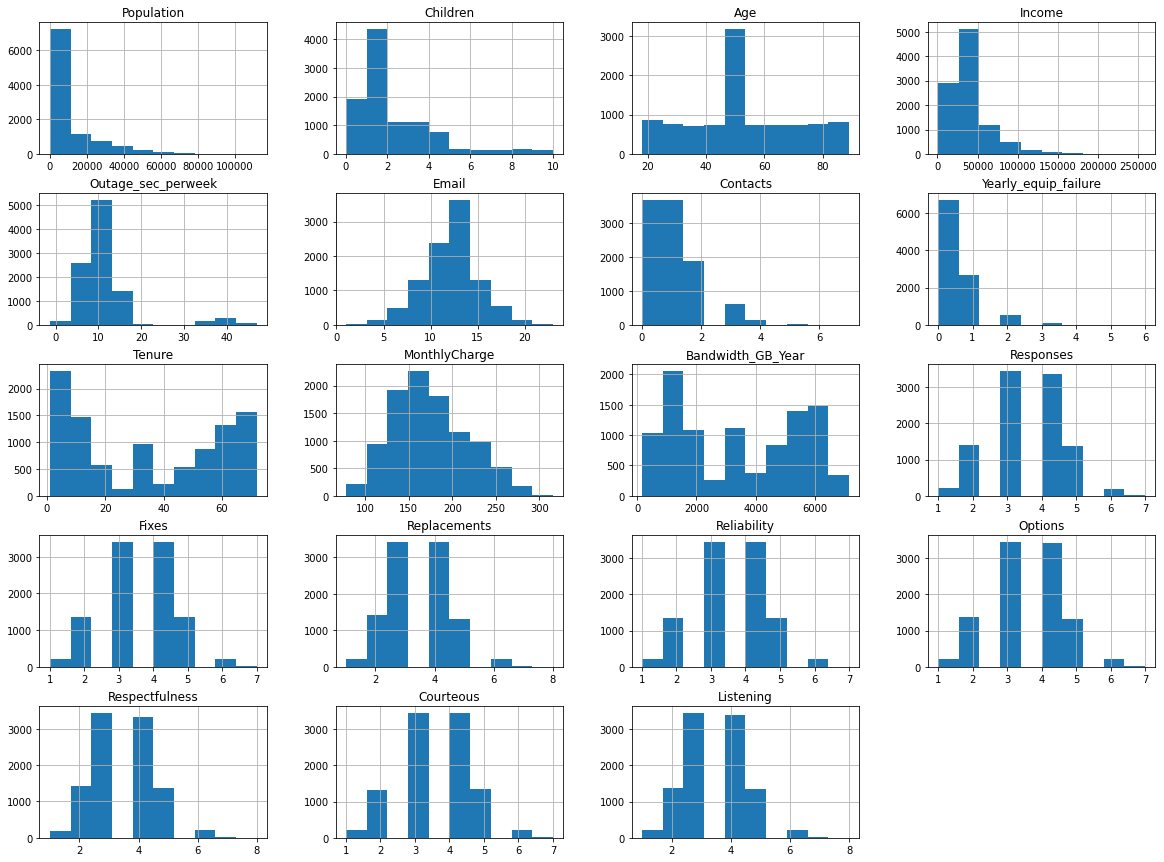

In [25]:
clean_df3.hist(figsize=(20, 15))
plt.show()

<AxesSubplot:>

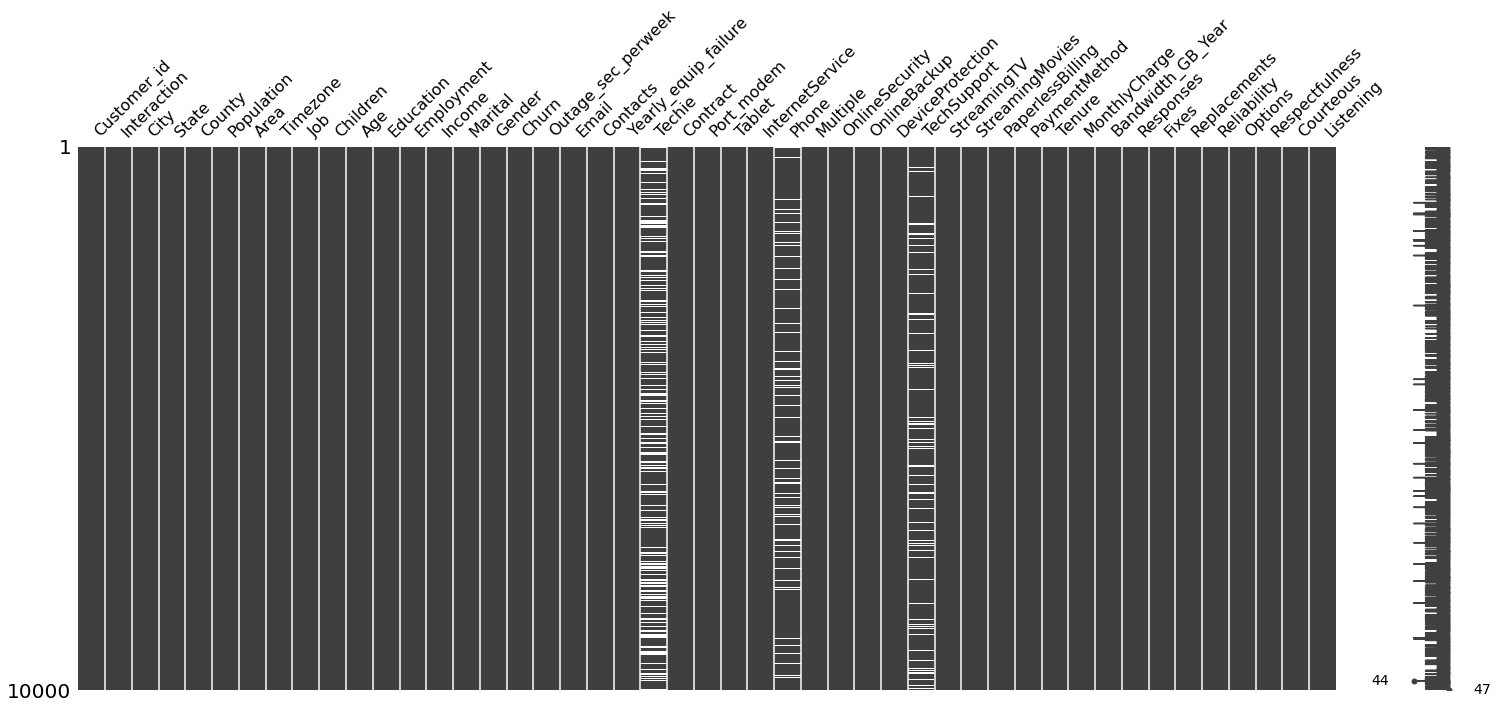

In [26]:
msno.matrix(clean_df3)

In [27]:
clean_df3.isnull().sum()

Customer_id                0
Interaction                0
City                       0
State                      0
County                     0
Population                 0
Area                       0
Timezone                   0
Job                        0
Children                   0
Age                        0
Education                  0
Employment                 0
Income                     0
Marital                    0
Gender                     0
Churn                      0
Outage_sec_perweek         0
Email                      0
Contacts                   0
Yearly_equip_failure       0
Techie                  2477
Contract                   0
Port_modem                 0
Tablet                     0
InternetService            0
Phone                   1026
Multiple                   0
OnlineSecurity             0
OnlineBackup               0
DeviceProtection           0
TechSupport              991
StreamingTV                0
StreamingMovies            0
PaperlessBilli

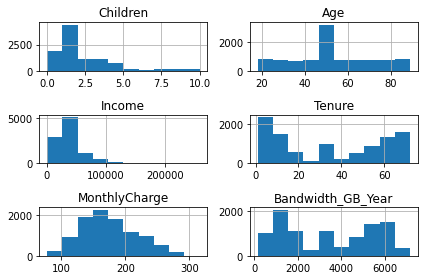

In [28]:
clean_df3[['Children', 'Age', 'Income', 'Tenure', 'Job', 'MonthlyCharge', 'Bandwidth_GB_Year']].hist()
plt.savefig('churn_plot.jpg')
plt.tight_layout()

<AxesSubplot:>

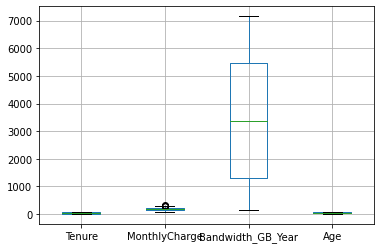

In [29]:
clean_df3.boxplot(['Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year', 'Age'])

<AxesSubplot:>

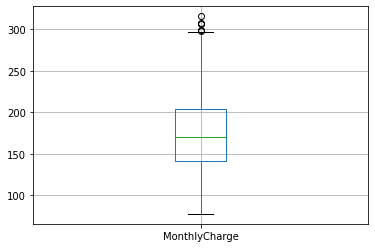

In [30]:
clean_df3.boxplot(['MonthlyCharge'])


<AxesSubplot:>

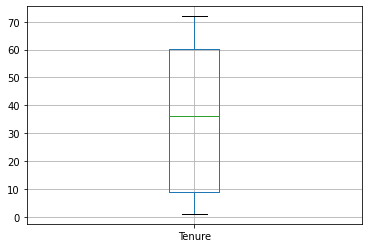

In [31]:
clean_df3.boxplot(['Tenure'])


<AxesSubplot:>

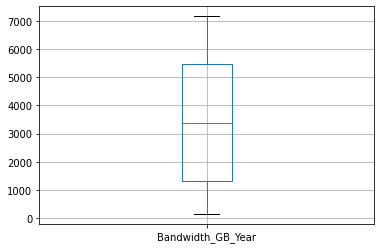

In [32]:
clean_df3.boxplot(['Bandwidth_GB_Year'])

# Outliers
Since monthly charges is displaying some outliers, we will get rid of %0.1 both from the bottom and from the top of the curve: anything above or below +-3 standard deviations from the mean. 

In [33]:
Q1 = clean_df3.quantile(0.001)
Q3 = clean_df3.quantile(0.999)
IQR = Q3 - Q1


In [34]:
q_low = clean_df3['MonthlyCharge'].quantile(0.01)
q_hi  = clean_df3['MonthlyCharge'].quantile(0.99)

In [35]:
df_filtered = clean_df3[(clean_df3['MonthlyCharge'] < q_hi) & (clean_df3['MonthlyCharge'] > q_low)]

In [36]:
df_filtered

,Customer_id,Interaction,City,State,County,Population,Area,Timezone,Job,Children,...,MonthlyCharge,Bandwidth_GB_Year,Responses,Fixes,Replacements,Reliability,Options,Respectfulness,Courteous,Listening
0,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,Point Baker,AK,Prince of Wales-Hyder,38,Urban,America/Sitka,Environmental health practitioner,1.0,...,171.449762,904.536110,5,5,5,3,4,4,3,4
1,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,West Branch,MI,Ogemaw,10446,Urban,America/Detroit,"Programmer, multimedia",1.0,...,242.948015,800.982766,3,4,3,3,4,3,4,4
2,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,Yamhill,OR,Yamhill,3735,Urban,America/Los_Angeles,Chief Financial Officer,4.0,...,159.440398,2054.706961,4,4,2,4,4,3,3,3
3,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,Del Mar,CA,San Diego,13863,Suburban,America/Los_Angeles,Solicitor,1.0,...,120.249493,2164.579412,4,4,4,2,5,4,3,3
4,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,Needville,TX,Fort Bend,11352,Suburban,America/Chicago,Medical illustrator,0.0,...,150.761216,271.493436,4,4,4,3,4,4,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,M324793,45deb5a2-ae04-4518-bf0b-c82db8dbe4a4,Mount Holly,VT,Rutland,640,Rural,America/New_York,Sport and exercise psychologist,3.0,...,159.828800,6511.253000,3,2,3,3,4,3,2,3
9996,D861732,6e96b921-0c09-4993-bbda-a1ac6411061a,Clarksville,TN,Montgomery,77168,Rural,America/Chicago,Consulting civil engineer,4.0,...,208.856400,5695.952000,4,5,5,4,4,5,2,5
9997,I243405,e8307ddf-9a01-4fff-bc59-4742e03fd24f,Mobeetie,TX,Wheeler,406,Rural,America/Chicago,IT technical support officer,1.0,...,168.220900,4159.306000,4,4,4,4,4,4,4,5
9998,I641617,3775ccfc-0052-4107-81ae-9657f81ecdf3,Carrollton,GA,Carroll,35575,Urban,America/New_York,Water engineer,1.0,...,252.628600,6468.457000,4,4,6,4,3,3,5,4


In [37]:
#original had 10000 rows. 
clean_df3.shape

(10000, 47)

In [38]:
#Filtering outliers resulted in a loss of 200 rows from the dataframe. That is 0.02% of all values. 
df_filtered.shape

(9800, 47)

## Export To CSV

In [39]:
df_filtered.to_csv('churn_clean.csv')

In [40]:
churn_user = pd.read_csv('churn_clean.csv')

In [41]:
churn_user.columns

Index(['Unnamed: 0', 'Customer_id', 'Interaction', 'City', 'State', 'County',
       'Population', 'Area', 'Timezone', 'Job', 'Children', 'Age', 'Education',
       'Employment', 'Income', 'Marital', 'Gender', 'Churn',
       'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure',
       'Techie', 'Contract', 'Port_modem', 'Tablet', 'InternetService',
       'Phone', 'Multiple', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'PaymentMethod', 'Tenure', 'MonthlyCharge',
       'Bandwidth_GB_Year', 'Responses', 'Fixes', 'Replacements',
       'Reliability', 'Options', 'Respectfulness', 'Courteous', 'Listening'],
      dtype='object')

In [42]:
data = churn_user.drop(columns=['Unnamed: 0', 'Customer_id', 'Interaction', 'City', 'State', 'County',
       'Population', 'Area', 'Timezone', 'Education',
       'Employment','Marital', 'Gender', 'Churn', 'Job',
       'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure',
       'Techie', 'Contract', 'Port_modem', 'Tablet', 'InternetService',
       'Phone', 'Multiple', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'PaymentMethod', 'Tenure'])
data.head()

,Children,Age,Income,MonthlyCharge,Bandwidth_GB_Year,Responses,Fixes,Replacements,Reliability,Options,Respectfulness,Courteous,Listening
0,1.0,68.0,28561.990,171.449762,904.536110,5,5,5,3,4,4,3,4
1,1.0,27.0,21704.770,242.948015,800.982766,3,4,3,3,4,3,4,4
2,4.0,50.0,33186.785,159.440398,2054.706961,4,4,2,4,4,3,3,3
3,1.0,48.0,18925.230,120.249493,2164.579412,4,4,4,2,5,4,3,3
4,0.0,83.0,40074.190,150.761216,271.493436,4,4,4,3,4,4,4,5


In [43]:
#Check changes to data after cleaning outliers
data.describe()

,Children,Age,Income,MonthlyCharge,Bandwidth_GB_Year,Responses,Fixes,Replacements,Reliability,Options,Respectfulness,Courteous,Listening
count,9800.000000,9800.000000,9800.000000,9800.000000,9800.000000,9800.000000,9800.000000,9800.000000,9800.000000,9800.000000,9800.000000,9800.000000,9800.000000
mean,1.817551,53.260408,38275.885710,173.849678,3399.496670,3.489388,3.503571,3.484898,3.495714,3.495000,3.496939,3.508061,3.494184
std,1.921348,17.997084,24746.888007,41.401263,2072.266113,1.037854,1.034159,1.025831,1.027126,1.024337,1.034752,1.029584,1.030392
min,0.000000,18.000000,901.210000,92.359860,155.506715,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,41.000000,23705.480000,141.551625,1312.859223,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,1.000000,53.000000,33186.785000,169.915400,3382.424000,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000
75%,3.000000,65.000000,45547.742500,202.804630,5467.834000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,10.000000,89.000000,258900.700000,275.859200,7158.982000,7.000000,7.000000,8.000000,7.000000,7.000000,8.000000,7.000000,8.000000


## Principal Component Analysis

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Children           9800 non-null   float64
 1   Age                9800 non-null   float64
 2   Income             9800 non-null   float64
 3   MonthlyCharge      9800 non-null   float64
 4   Bandwidth_GB_Year  9800 non-null   float64
 5   Responses          9800 non-null   int64  
 6   Fixes              9800 non-null   int64  
 7   Replacements       9800 non-null   int64  
 8   Reliability        9800 non-null   int64  
 9   Options            9800 non-null   int64  
 10  Respectfulness     9800 non-null   int64  
 11  Courteous          9800 non-null   int64  
 12  Listening          9800 non-null   int64  
dtypes: float64(5), int64(8)
memory usage: 995.4 KB


In [45]:
data.columns

Index(['Children', 'Age', 'Income', 'MonthlyCharge', 'Bandwidth_GB_Year',
       'Responses', 'Fixes', 'Replacements', 'Reliability', 'Options',
       'Respectfulness', 'Courteous', 'Listening'],
      dtype='object')

In [46]:
# Import Scikit Learn PCA application
from sklearn.decomposition import PCA

In [47]:
# Normalize the data
churn_normalized = (data - data.mean()) / data.std()

In [48]:
pca = PCA(n_components = data.shape[1])

In [49]:
churn_numeric = data[['Children', 'Age', 'Income', 'MonthlyCharge', 'Bandwidth_GB_Year',
       'Responses', 'Fixes', 'Replacements', 'Reliability', 'Options',
       'Respectfulness', 'Courteous', 'Listening']]
pcs_names = []
for i, col in enumerate(churn_numeric.columns):
    pcs_names.append('PC' + str(i + 1))
print(pcs_names)

['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13']


In [50]:
churn_normalized

,Children,Age,Income,MonthlyCharge,Bandwidth_GB_Year,Responses,Fixes,Replacements,Reliability,Options,Respectfulness,Courteous,Listening
0,-0.425509,0.818999,-0.392530,-0.057967,-1.203977,1.455516,1.447001,1.476952,-0.482623,0.493002,0.486166,-0.493463,0.490897
1,-0.425509,-1.459148,-0.669624,1.668991,-1.253948,-0.471538,0.480031,-0.472688,-0.482623,0.493002,-0.480249,0.477803,0.490897
2,1.135895,-0.181163,-0.205646,-0.348040,-0.648946,0.491989,0.480031,-1.447508,0.490968,0.493002,-0.480249,-0.493463,-0.479608
3,-0.425509,-0.292292,-0.781943,-1.294651,-0.595926,0.491989,0.480031,0.502132,-1.456213,1.469243,0.486166,-0.493463,-0.479608
4,-0.945977,1.652467,0.072668,-0.557675,-1.509460,0.491989,0.480031,0.502132,-0.482623,0.493002,0.486166,0.477803,1.461402
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,0.615427,-0.014469,0.705052,-0.338658,1.501620,-0.471538,-1.453908,-0.472688,-0.482623,0.493002,-0.480249,-1.464729,-0.479608
9796,1.135895,-0.292292,-0.205646,0.845547,1.108186,0.491989,1.447001,1.476952,0.490968,0.493002,1.452581,-1.464729,1.461402
9797,-0.425509,-0.014469,-0.205646,-0.135957,0.366656,0.491989,0.480031,0.502132,0.490968,0.493002,0.486166,0.477803,1.461402
9798,-0.425509,-0.792373,-0.873173,1.902814,1.480968,0.491989,0.480031,2.451771,0.490968,-0.483240,-0.480249,1.449070,0.490897


In [51]:
pca.fit(churn_normalized)
churn_pca = pd.DataFrame(pca.transform(churn_normalized),
                        columns = pcs_names)

In [52]:
rotation = pd.DataFrame(pca.components_.T, columns = pcs_names, index = churn_numeric.columns)

In [53]:
churn_pca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
0,1.910840,1.685409,-1.152799,-1.009855,0.037023,0.393474,0.551713,0.066641,-0.817142,0.226314,-0.151810,-0.041040,0.002180
1,-0.227997,0.324990,0.416005,-0.362573,-1.118163,-0.582701,2.229489,0.600577,0.797821,-0.502672,0.194961,-0.448458,-0.676021
2,-0.675153,0.109145,-0.479868,0.808933,-0.299262,0.875008,0.354952,-0.138383,-0.401038,-0.336013,1.014887,-1.353300,0.419261
3,0.041926,2.166006,-1.296139,-0.075243,-0.996353,-0.184410,-0.421740,-0.103312,0.245752,0.846958,0.457280,0.199786,-0.043834
4,1.315133,0.544816,-1.900186,-1.431782,0.889072,0.218816,0.157294,1.079326,0.482464,0.007580,0.134641,0.216926,-0.089899
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,-2.072905,0.362482,0.900879,0.803690,0.541763,0.049248,-1.077442,0.336509,-0.629256,0.573778,-0.078184,0.529622,0.647792
9796,1.932026,0.815582,1.490863,0.352456,-0.233638,0.790081,0.004553,1.124951,-2.041412,0.807288,0.528140,0.531243,-0.827104
9797,1.438078,0.067392,0.109596,-0.376557,-0.176669,-0.295199,-0.415716,1.045402,-0.059841,-0.415722,0.540216,0.314453,-0.089274
9798,2.029927,0.181028,2.373560,-0.733196,-0.932011,-0.404398,0.265096,-0.423285,0.106435,-1.481418,-1.249545,1.184897,-0.370587


In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

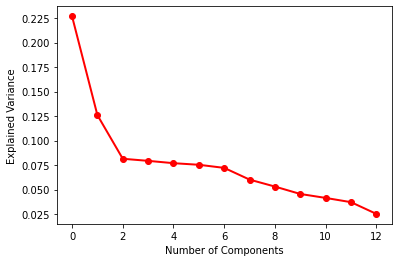

In [55]:


# Run the scree plot
plt.plot(pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')
plt.show();



In [56]:
for pc, var in zip(pcs_names, np.cumsum(pca.explained_variance_ratio_)):
    print(pc, var)

PC1 0.22682676535985857
PC2 0.35274700058767927
PC3 0.43415288114774125
PC4 0.513433014988589
PC5 0.5903321322015216
PC6 0.6655959133485576
PC7 0.7376917699490496
PC8 0.7978221858463064
PC9 0.8508482649170556
PC10 0.8963224344706193
PC11 0.9377638172216671
PC12 0.9748710181450632
PC13 0.9999999999999998


In [57]:


# Above, we see that 86% of variance is explained by 9 components
# Rotate and reshape the data set. 
rotation = pd.DataFrame(pca.components_.T, columns = pcs_names, index = churn_numeric.columns)
print(rotation)



                        PC1       PC2       PC3       PC4       PC5       PC6  \
Children          -0.000139  0.006749  0.136298  0.639993  0.020469  0.748269   
Age                0.003641 -0.019691 -0.188621 -0.550670  0.554885  0.525965   
Income            -0.001178  0.021628 -0.003720  0.408055  0.818695 -0.386161   
MonthlyCharge     -0.003385 -0.013838  0.654074 -0.333214  0.130710  0.083075   
Bandwidth_GB_Year -0.006814  0.027951  0.718418  0.035626  0.024864 -0.081245   
Responses          0.458288  0.283111  0.007495 -0.004619 -0.012954  0.007345   
Fixes              0.433733  0.285620  0.003469 -0.012484  0.006747  0.009964   
Replacements       0.399742  0.284490 -0.026247 -0.007254 -0.036269 -0.006286   
Reliability        0.146848 -0.569380 -0.000289 -0.008782 -0.026041 -0.017253   
Options           -0.176308  0.590136 -0.009468 -0.039715  0.002434  0.002883   
Respectfulness     0.406091 -0.182490  0.014855  0.007840  0.008680  0.003758   
Courteous          0.359317 

In [58]:
# Output loadings for components
loadings = pd.DataFrame(pca.components_.T,
                       columns = pcs_names,
                       index = data.columns)
loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
Children,-0.000139,0.006749,0.136298,0.639993,0.020469,0.748269,0.089877,0.036682,-0.032982,-0.020202,0.013598,0.017152,-0.007843
Age,0.003641,-0.019691,-0.188621,-0.550670,0.554885,0.525965,-0.269762,-0.051861,0.007629,0.000844,-0.018782,0.008873,0.017189
Income,-0.001178,0.021628,-0.003720,0.408055,0.818695,-0.386161,0.096632,0.007422,-0.062580,-0.006080,0.001513,0.016018,0.004652
MonthlyCharge,-0.003385,-0.013838,0.654074,-0.333214,0.130710,0.083075,0.659165,-0.024056,0.003674,-0.030137,-0.004018,0.024310,-0.018960
Bandwidth_GB_Year,-0.006814,0.027951,0.718418,0.035626,0.024864,-0.081245,-0.686981,0.021391,-0.032895,0.020867,-0.021506,0.003755,0.012861
Responses,0.458288,0.283111,0.007495,-0.004619,-0.012954,0.007345,0.027993,-0.069480,-0.118215,-0.046316,0.028120,-0.239234,0.793579
Fixes,0.433733,0.285620,0.003469,-0.012484,0.006747,0.009964,-0.004428,-0.107609,-0.169367,-0.069701,0.079244,-0.592375,-0.572411
Replacements,0.399742,0.284490,-0.026247,-0.007254,-0.036269,-0.006286,-0.004829,-0.171586,-0.257543,-0.134814,-0.407139,0.667637,-0.178060
Reliability,0.146848,-0.569380,-0.000289,-0.008782,-0.026041,-0.017253,-0.032556,-0.171928,-0.482412,-0.451434,0.420764,0.093008,0.019025
Options,-0.176308,0.590136,-0.009468,-0.039715,0.002434,0.002883,-0.012991,0.132761,0.063890,-0.225753,0.685353,0.273187,-0.042350


In [59]:
# Extract reduced data set. 
churn_reduced = churn_pca.iloc[ : , 0:3]
print(churn_reduced)

           PC1       PC2       PC3
0     1.910840  1.685409 -1.152799
1    -0.227997  0.324990  0.416005
2    -0.675153  0.109145 -0.479868
3     0.041926  2.166006 -1.296139
4     1.315133  0.544816 -1.900186
...        ...       ...       ...
9795 -2.072905  0.362482  0.900879
9796  1.932026  0.815582  1.490863
9797  1.438078  0.067392  0.109596
9798  2.029927  0.181028  2.373560
9799 -2.250098 -0.604323  1.798662

[9800 rows x 3 columns]


# Part III: Data Cleaning <a class="anchor" id="Data_Cleaning"></a>

## Data Cleaning Summary

### D1: Findings from Data Cleaning

There was many missing data with meaningful variable fields including Children, Age, Income, Tenure and Bandwidth_GB_Year. Given mean and variance of these variables, it seemed reasonable to impute missing values with median values. Many categorical (such as whether or not the customer was "Techie") & non-numeric (columns for customer ID numbers & related customer transaction IDs) data were not included in analysis given they seemed less meaningful to interpretation and decision-making. The anomalies discovered were not significant & were mitigated as follows.

### D2: Justification of Mitigation Methods: 

I mitigated missing values with imputation using median values. Median was used instead of mean to mitigate the effect of outliers on mean calculation, since mean is affected in by potential outliers. Outliers were ignored for the columns 'Children', 'Age', 'Income', 'Tenure', and 'Bandwidth_GB_Year'. The MonthlyCharge column had outliers, so I cleaned all outliers that were above and below 3 standard deviations from the mean. This accounted for 0.02% of all observations from Monthly Charge.  

### D3: Summary of Outcomes

1. Examined data types and statistics for each column. 
2. Examined data distribution for missing values. 
3. Use median to replace missing values 
4. Examined distribution of data to see changes. 
5. Use boxplots to determine if there were any outliers in selected columns. 
6. Selected montly charge column, since it had outliers.
7. Removed outliers on the montly charge column, resulting in a loss of 2% or 200 rows of data. 
8. Removed features, and selected specific features for Principal Component Analysis 
9. Normalized values. 
10. Performed PCA using scree plot
11. Created loadings for components


### D4 Mitigation Code

See above code, and Panopto Recording, below. 

### D5 Clean Data

See attached file 'churn_clean.csv'

### D6 Limitations

There are two limitations of the this data.

First, we dont know the logic of how the data was ingested. We do not know the logic of the code that was used to determine categories for each category of the churn feature/column.

Second, we don't have business context about the data within the CSV. We don't know the context of the full table, within the database/datawarehouse. There maybe other columns within the data set that were excluded, which may help with churn prediction. In addition, I am unable to ask business steakholders about the data. Important columns such as age, children, and income have a large number null values, which could be important features in predicting churn or answering business questions. We are unable to ask whether these columns contain null values as result of specific rules or if someone forgot to add the data. In a real world project, you would be able to ask individuals the reasons for this missing data. 


### D7: Affects on Limitations on Business Question/Hypothesis

There are three major effects: 

First, filling the null data points with the median amounts for each column changes predictive and/or prescriptive analysis. 
The sample is skewed, resulting in a possiblily higher chance of overfitting or underfitting on either a linear regression or logistic regression model. This would depend highly on the difference between the mean and the median value. The bias and error for points that were filled by a median value will change drastically, assuming we could consult later with the business. Null values would simply be excluded from a regression model, as they contain no value.

Second, the proportion of nulls. Roughly 25% of the entries for the children, income, and age columns were null. For the Bandwidth_GB_Year or phone numbers, this was about 10%. For any churn analysis related to children, income, and age, wether it is descriptive, diagnostic, prescritive, or predictive, would be highly skewed, since a quarter of the data is missing. It would be very difficult to draw accurate conclusions or built a model where 25% of the data is missing. From a business perspective, it raises the question of how the data is being ingested and the reason for a high number of errors, wether they are human or technology related. A good solution is greater data governance oversight, as well as documentation of use cases to determine when or even if a column should be null.


Third, relates to the mathematical aspect of median. Median is not good for planning. A median cannot tell you about the max, the min, or the total value. However, without business feedback on outliers that we need to remove, we must use median as to fill in the data. Unlike mean, median is not amenable to further mathematical calculation, and therefore, is not used in many statistical tests.This may heavily skew data for statistical tests used by the business to determine trends, predictions, or characteristics of customers. 


## Principal Component Analysis

### E1. Most Important Principal Components

The principal components that I selected for PCA were:
* Children
* Age
* Income
* Monthly Charge
* Bandwidth_GB_Year

### E2 How did you identify the principal components of the data set?

Principal Component Analysis is optimal if run on features/dependent variables which are continuous variables. It is also a valid method of feature selection is if the most important variables have a high rate of variation. The components I selected have a relatively high variance and standard deviation, which makes them ideal for PCA. I used a scree plot & extracted the eigenvalues for an elbow plot.  The elbow bent at the 2nd Principal Component, but kept an value until the 13th component, where it approached 1.0. I then selected the fewest number of components were selected based on the 86% explanation at 9 components using the Numpy cumsum method. I then used rotation to gind the most importance features.


### E3. Benefits

The result from the PCA loading shows that the number of children, age, income, monthly, charge, and Bandwith GB Year, affect the churn rate. Given the high rate of churn, which is 26.5% of the data set, greater emphasis should be given to the role these factors play in churn. Particularly, it would be important for the business to focus remarketing and retention efforts towards individuals with features that show a higher tencies to churn. These efforts should include discounts, special offers, loyalty, and referral programs. This may reduce churn, by focusing on customers most at risk of churning. 

# Part IV: Supporting Documents <a class="anchor" id="Data_Cleaning_Plan"></a>

## Part F: Video 

https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=0f97fb97-ec51-41da-8f81-ad4301706858

## Part G: Web Sources

“Counting Null as Percentage.” Stack Overflow, stackoverflow.com/questions/41826019/counting-null-as-percentage. Accessed 6 June 2021.

Larose, C. D. & Larose, D. T.   (2019).   Data Science: Using Python and R.   John Wiley & Sons, Inc.

Sharma, Aditya. “Principal Component Analysis (PCA) in Python.” Datacamp, 16 Jan. 2020, www.datacamp.com/community/tutorials/principal-component-analysis-in-python.

https://stackoverflow.com/questions/23199796/detect-and-exclude-outliers-in-pandas-data-frame

## Part H: Text Sources

Walker, Michael. <i>Python Data Cleaning Cookbook: Modern Techniques and Python Tools to Detect and Remove Dirty Data and Extract Key Insights.</i> Packt Publishing, 2020.